# IPL DATA BALL BY BALL

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
data = pd.read_csv('ipl_data.csv')

In [211]:
data.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


## Data preprocessing

In [212]:
data.shape

(193468, 18)

In [213]:
data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [214]:
data.dtypes

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [216]:
data.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [217]:
np.round(data.describe(),2)

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,193468.00,193468.00,193468.00,193468.00,193468.00,193468.00,193468.00,193468.00,193468.00
mean,756768.81,1.48,9.18,3.62,1.24,0.07,1.31,0.00,0.05
std,306097.09,0.50,5.68,1.81,1.61,0.34,1.60,0.01,0.22
min,335982.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,501227.00,1.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00
50%,729297.00,1.00,9.00,4.00,1.00,0.00,1.00,0.00,0.00
75%,1082628.00,2.00,14.00,5.00,1.00,0.00,1.00,0.00,0.00
max,1237181.00,2.00,19.00,9.00,6.00,7.00,7.00,1.00,1.00


In [218]:
data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [219]:
data.duplicated().sum()

1

<AxesSubplot:>

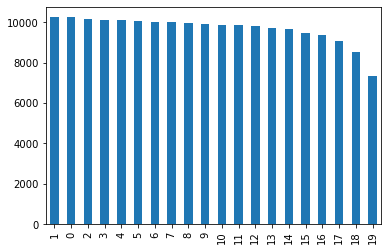

In [220]:
data['over'].value_counts().plot(kind="bar")

<AxesSubplot:>

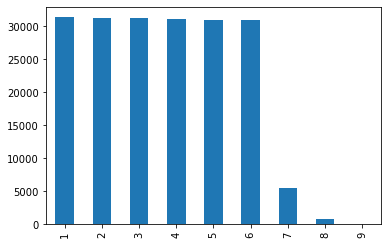

In [221]:
data['ball'].value_counts().plot(kind="bar")

<AxesSubplot:>

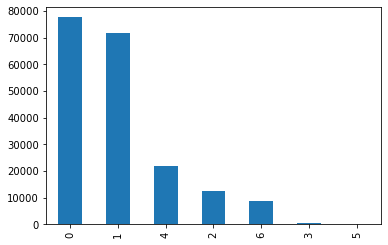

In [222]:
data['batsman_runs'].value_counts().plot(kind="bar")

<AxesSubplot:>

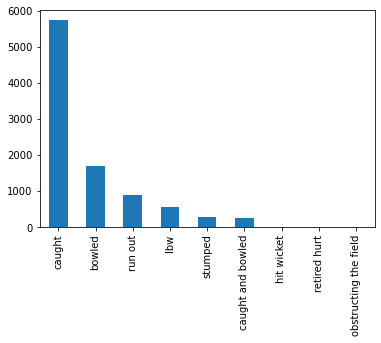

In [223]:
data['dismissal_kind'].value_counts().plot(kind="bar")

In [224]:
data['non_boundary'].value_counts()

0    193452
1        16
Name: non_boundary, dtype: int64

## Bowler Analysis

Find unique bowlers

In [225]:
len(pd.unique(data["bowler"]))

420

No. of overs per bowler

In [226]:
Bowler_over= data[data["extra_runs"]==0][["ball","bowler"]]
Bowler_over= Bowler_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bowler_over["No_of_Overs"]=(np.floor(Bowler_over["ball"]/6))
Bowler_over = Bowler_over[Bowler_over["ball"] >= 60] 
Bowler_over

,bowler,ball,No_of_Overs
0,Harbhajan Singh,3325,554.0
1,PP Chawla,3218,536.0
2,R Ashwin,3186,531.0
3,A Mishra,3128,521.0
4,SL Malinga,2753,458.0
...,...,...,...
293,A Flintoff,65,10.0
294,DNT Zoysa,65,10.0
295,MJ Clarke,64,10.0
296,S Dube,63,10.0


Total no. of runs

In [227]:
Bowler_Runs= data.groupby("bowler")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_Runs.columns=["bowler","Total_runs_given"]
Bowler_Runs

,bowler,Total_runs_given
0,PP Chawla,4330
1,Harbhajan Singh,4038
2,A Mishra,3913
3,DJ Bravo,3869
4,R Ashwin,3756
...,...,...
415,SN Khan,6
416,AM Rahane,5
417,SPD Smith,5
418,DA Warner,2


Total Boundaries given

In [228]:
Bowler_boundary = data.query('batsman_runs == 4 | batsman_runs == 6')
Bowler_boundary = Bowler_boundary.groupby("bowler")["batsman_runs"].count().reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Bowler_boundary.columns=["bowler","Total_boundaries_given"]
Bowler_boundary

,bowler,Total_boundaries_given
0,UT Yadav,509
1,PP Chawla,497
2,DJ Bravo,443
3,P Kumar,442
4,Harbhajan Singh,431
...,...,...
411,Y Gnaneswara Rao,1
412,SPD Smith,1
413,SN Khan,1
414,SA Yadav,1


Total wickets per bowler

In [229]:
Bowler_wicket = data[data["dismissal_kind"] != "run out"]
Bowler_wicket= Bowler_wicket.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_wicket.columns=["bowler","Wickets"]
Bowler_wicket

,bowler,Wickets
0,SL Malinga,170
1,A Mishra,160
2,PP Chawla,156
3,DJ Bravo,153
4,Harbhajan Singh,150
...,...,...
415,BJ Rohrer,0
416,P Ray Barman,0
417,P Prasanth,0
418,P Dubey,0


Total dot balls by the bowler

In [230]:
Bowler_Dots = data[data["total_runs"] == 0]
Bowler_Dots= Bowler_Dots.groupby("bowler")["total_runs"].count().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_Dots.columns=["bowler","Dot_balls"]
Bowler_Dots

,bowler,Dot_balls
0,Harbhajan Singh,1244
1,R Ashwin,1166
2,B Kumar,1155
3,SL Malinga,1144
4,PP Chawla,1137
...,...,...
404,C Ganapathy,1
405,BJ Rohrer,1
406,B Chipli,1
407,FY Fazal,1


Calculate runs for Powerplay, Middle over and Death overs

Powerplay

In [236]:
Bowler_powerplay_wickets = data[data["over"] < 6]
Bowler_powerplay_wickets =  Bowler_powerplay_wickets.groupby("bowler")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_powerplay_wickets.columns=["bowler","Powerplay_runs"]

Bowler_powerplay_runs = data.query('dismissal_kind != "run out" & over < 6')
Bowler_powerplay_runs= Bowler_powerplay_runs.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_powerplay_runs.columns=["bowler","Powerplay_wickets"]

Bowler_powerplay_over = data.query('extra_runs == 0 & over < 6')
Bowler_powerplay_over= Bowler_powerplay_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bowler_powerplay_over["Powerplay_over"]=np.round(Bowler_powerplay_over["ball"]/6,1)

Bowler_powerplay = pd.merge(Bowler_powerplay_runs,Bowler_powerplay_wickets,on="bowler")
Bowler_powerplay = pd.merge(Bowler_powerplay, Bowler_powerplay_over, on="bowler")
Bowler_powerplay["Powerplay_economy"] = np.round(Bowler_powerplay["Powerplay_runs"] / Bowler_powerplay["Powerplay_over"],1)

del Bowler_powerplay['ball']
Bowler_powerplay

,bowler,Powerplay_wickets,Powerplay_runs,Powerplay_over,Powerplay_economy
0,Z Khan,53,1492,209.7,7.1
1,Sandeep Sharma,53,1447,201.2,7.2
2,B Kumar,48,1472,234.0,6.3
3,UT Yadav,45,1424,174.3,8.2
4,DS Kulkarni,44,1274,165.8,7.7
...,...,...,...,...,...
339,CJ Green,0,16,2.0,8.0
340,MM Ali,0,31,4.8,6.5
341,MJ Henry,0,36,3.0,12.0
342,MG Neser,0,18,1.0,18.0


Middle Over

In [237]:
Bowler_middle_wickets = data.query('over >= 6 & over <= 15')
Bowler_middle_wickets =  Bowler_middle_wickets.groupby("bowler")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_middle_wickets.columns=["bowler","Middle_runs"]

Bowler_middle_runs = data.query('dismissal_kind != "run out" & over >= 6 & over <= 15')
Bowler_middle_runs= Bowler_middle_runs.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_middle_runs.columns=["bowler","Middle_wickets"]

Bowler_middle_over = data.query('extra_runs == 0 & over >= 6 & over <= 15')
Bowler_middle_over= Bowler_middle_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bowler_middle_over["Middle_over"]=np.round(Bowler_middle_over["ball"]/6,1)

Bowler_middle = pd.merge(Bowler_middle_runs,Bowler_middle_wickets,on="bowler")
Bowler_middle = pd.merge(Bowler_middle, Bowler_middle_over,on="bowler")
Bowler_middle["Middle_economy"] = np.round(Bowler_middle["Middle_runs"] / Bowler_middle["Middle_over"],1)

del Bowler_middle['ball']
Bowler_middle

,bowler,Middle_wickets,Middle_runs,Middle_over,Middle_economy
0,A Mishra,130,3319,457.3,7.3
1,PP Chawla,112,3463,436.2,7.9
2,Harbhajan Singh,101,2904,404.0,7.2
3,YS Chahal,94,2065,271.2,7.6
4,RA Jadeja,84,2854,371.3,7.7
...,...,...,...,...,...
401,BJ Rohrer,0,12,1.0,12.0
402,SC Kuggeleijn,0,27,3.0,9.0
403,MG Neser,0,11,1.0,11.0
404,MJ Henry,0,27,1.0,27.0


Death Over

In [238]:
Bowler_death_wickets = data.query('over >= 16')
Bowler_death_wickets =  Bowler_death_wickets.groupby("bowler")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_death_wickets.columns=["bowler","Death_wickets"]

Bowler_death_runs = data.query('dismissal_kind != "run out" & over >= 16')
Bowler_death_runs= Bowler_death_runs.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_death_runs.columns=["bowler","Death_runs"]

Bowler_death_over = data.query('extra_runs == 0 & over >= 16')
Bowler_death_over= Bowler_death_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bowler_death_over["Death_over"]=np.round(Bowler_death_over["ball"]/6,1)

Bowler_death = pd.merge(Bowler_death_wickets,Bowler_death_runs,on="bowler")
Bowler_death = pd.merge(Bowler_death, Bowler_death_over,on="bowler")
Bowler_death["Death_economy"] = np.round(Bowler_death["Death_runs"] / Bowler_death["Death_over"],1)

del Bowler_death['ball']
Bowler_death

,bowler,Death_wickets,Death_runs,Death_over,Death_economy
0,DJ Bravo,1599,82,155.2,0.5
1,B Kumar,1267,66,129.2,0.5
2,SL Malinga,1252,90,147.0,0.6
3,JJ Bumrah,1208,53,127.5,0.4
4,UT Yadav,1072,42,95.7,0.4
...,...,...,...,...,...
331,MJ Santner,1,1,1.0,1.0
332,DJ Muthuswami,1,1,1.0,1.0
333,JM Kemp,1,0,0.2,0.0
334,AJ Finch,1,0,0.2,0.0


In [239]:
Bowler_details = pd.merge(Bowler_over,Bowler_Runs,on='bowler')
Bowler_details = pd.merge(Bowler_details,Bowler_wicket,on='bowler')
Bowler_details = pd.merge(Bowler_details,Bowler_Dots,on='bowler')
Bowler_details = pd.merge(Bowler_details,Bowler_boundary,on='bowler')
Bowler_details = pd.merge(Bowler_details,Bowler_powerplay,on='bowler')
Bowler_details = pd.merge(Bowler_details,Bowler_middle,on='bowler')
Bowler_details = pd.merge(Bowler_details,Bowler_death,on='bowler')
Bowler_details

,bowler,ball,No_of_Overs,Total_runs_given,Wickets,Dot_balls,Total_boundaries_given,Powerplay_wickets,Powerplay_runs,Powerplay_over,Powerplay_economy,Middle_wickets,Middle_runs,Middle_over,Middle_economy,Death_wickets,Death_runs,Death_over,Death_economy
0,Harbhajan Singh,3325,554.0,4038,150,1244,431,30,894,122.0,7.3,101,2904,404.0,7.2,240,19,28.2,0.7
1,PP Chawla,3218,536.0,4330,156,1137,497,18,445,58.5,7.6,112,3463,436.2,7.9,422,26,41.7,0.6
2,R Ashwin,3186,531.0,3756,138,1166,361,42,1003,150.8,6.7,83,2384,338.0,7.1,369,13,42.2,0.3
3,A Mishra,3128,521.0,3913,160,1125,394,6,164,21.7,7.6,130,3319,457.3,7.3,430,24,42.3,0.6
4,SL Malinga,2753,458.0,3486,170,1144,400,37,1210,180.7,6.7,43,1024,131.2,7.8,1252,90,147.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,JJ van der Wath,70,11.0,134,3,29,23,0,41,5.0,8.2,1,44,3.0,14.7,49,2,3.7,0.5
265,TP Sudhindra,69,11.0,137,1,18,18,0,40,4.0,10.0,1,58,5.0,11.6,39,0,2.5,0.0
266,AP Dole,65,10.0,114,5,20,15,2,62,5.0,12.4,2,39,4.8,8.1,13,1,1.0,1.0
267,A Flintoff,65,10.0,106,2,20,14,0,21,2.0,10.5,1,33,5.8,5.7,52,1,3.0,0.3


Calculating Economy, Strike Rate and %age of dots

In [240]:
Bowler_details["Economy"] = np.round(Bowler_details["Total_runs_given"]/Bowler_details["No_of_Overs"],1)
Bowler_details["Strike Rate"] = np.round(Bowler_details["ball"]/Bowler_details["Wickets"],1)
Bowler_details["%age of dots"] = np.round((Bowler_details["Dot_balls"]/Bowler_details["ball"]) * 100,1)
Bowler_details["%boundaries"] = np.round((Bowler_details["Total_boundaries_given"]/Bowler_details["ball"]) * 100,1)
Bowler_details

,bowler,ball,No_of_Overs,Total_runs_given,Wickets,Dot_balls,Total_boundaries_given,Powerplay_wickets,Powerplay_runs,Powerplay_over,...,Middle_over,Middle_economy,Death_wickets,Death_runs,Death_over,Death_economy,Economy,Strike Rate,%age of dots,%boundaries
0,Harbhajan Singh,3325,554.0,4038,150,1244,431,30,894,122.0,...,404.0,7.2,240,19,28.2,0.7,7.3,22.2,37.4,13.0
1,PP Chawla,3218,536.0,4330,156,1137,497,18,445,58.5,...,436.2,7.9,422,26,41.7,0.6,8.1,20.6,35.3,15.4
2,R Ashwin,3186,531.0,3756,138,1166,361,42,1003,150.8,...,338.0,7.1,369,13,42.2,0.3,7.1,23.1,36.6,11.3
3,A Mishra,3128,521.0,3913,160,1125,394,6,164,21.7,...,457.3,7.3,430,24,42.3,0.6,7.5,19.6,36.0,12.6
4,SL Malinga,2753,458.0,3486,170,1144,400,37,1210,180.7,...,131.2,7.8,1252,90,147.0,0.6,7.6,16.2,41.6,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,JJ van der Wath,70,11.0,134,3,29,23,0,41,5.0,...,3.0,14.7,49,2,3.7,0.5,12.2,23.3,41.4,32.9
265,TP Sudhindra,69,11.0,137,1,18,18,0,40,4.0,...,5.0,11.6,39,0,2.5,0.0,12.5,69.0,26.1,26.1
266,AP Dole,65,10.0,114,5,20,15,2,62,5.0,...,4.8,8.1,13,1,1.0,1.0,11.4,13.0,30.8,23.1
267,A Flintoff,65,10.0,106,2,20,14,0,21,2.0,...,5.8,5.7,52,1,3.0,0.3,10.6,32.5,30.8,21.5


In [245]:
Bowler_details.to_csv('bowler.csv')

Sort the bowlers based on their KPIs

In [241]:
Bowler_details.sort_values(by="Economy")

,bowler,ball,No_of_Overs,Total_runs_given,Wickets,Dot_balls,Total_boundaries_given,Powerplay_wickets,Powerplay_runs,Powerplay_over,...,Middle_over,Middle_economy,Death_wickets,Death_runs,Death_over,Death_economy,Economy,Strike Rate,%age of dots,%boundaries
177,A Chandila,232,38.0,245,11,103,27,10,139,23.8,...,13.8,7.2,6,0,1.0,0.0,6.4,21.1,44.4,11.6
35,Rashid Khan,1451,241.0,1573,75,605,163,7,155,20.5,...,196.0,6.2,195,10,25.3,0.4,6.5,19.3,41.7,11.2
201,SMSM Senanayake,190,31.0,211,9,73,22,4,111,20.8,...,9.0,9.4,15,1,1.8,0.6,6.8,21.1,38.4,11.6
56,A Kumble,942,157.0,1089,45,374,107,3,90,17.7,...,122.3,7.0,148,14,17.0,0.8,6.9,20.9,39.7,11.4
156,Mohammad Nabi,289,48.0,331,11,115,34,7,129,21.5,...,25.5,7.2,19,0,1.2,0.0,6.9,26.3,39.8,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,S Narwal,105,17.0,203,5,37,30,3,106,10.8,...,4.7,13.6,33,2,2.0,1.0,11.9,21.0,35.2,28.6
256,KJ Abbott,94,15.0,182,2,28,28,0,73,6.8,...,5.8,12.4,37,0,3.0,0.0,12.1,47.0,29.8,29.8
251,TU Deshpande,101,16.0,193,3,28,29,1,62,6.0,...,7.8,12.2,36,1,3.0,0.3,12.1,33.7,27.7,28.7
264,JJ van der Wath,70,11.0,134,3,29,23,0,41,5.0,...,3.0,14.7,49,2,3.7,0.5,12.2,23.3,41.4,32.9


In [242]:
Bowler_details.sort_values(by="Strike Rate")

,bowler,ball,No_of_Overs,Total_runs_given,Wickets,Dot_balls,Total_boundaries_given,Powerplay_wickets,Powerplay_runs,Powerplay_over,...,Middle_over,Middle_economy,Death_wickets,Death_runs,Death_over,Death_economy,Economy,Strike Rate,%age of dots,%boundaries
239,Umar Gul,127,21.0,198,12,51,22,4,42,5.8,...,9.0,9.1,74,4,6.3,0.6,9.4,10.6,40.2,17.3
174,Sohail Tanvir,238,39.0,275,22,121,34,6,145,21.3,...,3.2,6.2,110,16,15.2,1.1,7.1,10.8,50.8,14.3
221,CK Langeveldt,150,25.0,199,13,69,25,6,99,13.5,...,4.7,9.4,56,4,6.8,0.6,8.0,11.5,46.0,16.7
172,L Ngidi,245,40.0,331,20,107,43,6,129,18.5,...,8.8,6.2,147,10,13.5,0.7,8.3,12.2,43.7,17.6
73,K Rabada,787,131.0,1136,61,304,146,8,431,50.3,...,35.7,7.6,434,35,45.2,0.8,8.7,12.9,38.6,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,TM Dilshan,269,44.0,368,5,79,42,0,62,7.0,...,35.7,7.9,25,0,2.2,0.0,8.4,53.8,29.4,15.6
245,Ankit Soni,108,18.0,145,2,37,15,0,3,1.0,...,16.8,8.2,4,0,0.2,0.0,8.1,54.0,34.3,13.9
265,TP Sudhindra,69,11.0,137,1,18,18,0,40,4.0,...,5.0,11.6,39,0,2.5,0.0,12.5,69.0,26.1,26.1
259,AA Jhunjhunwala,84,14.0,130,1,27,15,0,47,5.0,...,8.8,9.2,2,0,0.2,0.0,9.3,84.0,32.1,17.9


In [243]:
Bowler_details.sort_values(by="%boundaries")

,bowler,ball,No_of_Overs,Total_runs_given,Wickets,Dot_balls,Total_boundaries_given,Powerplay_wickets,Powerplay_runs,Powerplay_over,...,Middle_over,Middle_economy,Death_wickets,Death_runs,Death_over,Death_economy,Economy,Strike Rate,%age of dots,%boundaries
207,IS Sodhi,179,29.0,204,9,64,17,2,17,2.0,...,27.7,6.5,6,0,0.2,0.0,7.0,19.9,35.8,9.5
120,RE van der Merwe,432,72.0,515,21,148,42,3,60,5.8,...,57.2,6.4,88,6,9.0,0.7,7.2,20.6,34.3,9.7
175,BAW Mendis,237,39.0,288,8,76,26,2,49,9.0,...,24.5,7.6,54,1,6.0,0.2,7.4,29.6,32.1,11.0
211,KP Pietersen,171,28.0,218,7,54,19,1,20,3.0,...,22.5,7.5,29,1,3.0,0.3,7.8,24.4,31.6,11.1
35,Rashid Khan,1451,241.0,1573,75,605,163,7,155,20.5,...,196.0,6.2,195,10,25.3,0.4,6.5,19.3,41.7,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,P Amarnath,127,21.0,241,7,29,36,0,12,1.0,...,19.2,10.8,21,0,1.0,0.0,11.5,18.1,22.8,28.3
247,S Narwal,105,17.0,203,5,37,30,3,106,10.8,...,4.7,13.6,33,2,2.0,1.0,11.9,21.0,35.2,28.6
251,TU Deshpande,101,16.0,193,3,28,29,1,62,6.0,...,7.8,12.2,36,1,3.0,0.3,12.1,33.7,27.7,28.7
256,KJ Abbott,94,15.0,182,2,28,28,0,73,6.8,...,5.8,12.4,37,0,3.0,0.0,12.1,47.0,29.8,29.8


# IPL DATA MATCH WISE

In [246]:
df = pd.read_csv('IPL Matches 2008-2020.csv')

In [247]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


## Data preprocessing

In [249]:
df.shape

(816, 17)

In [253]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [254]:
df.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [255]:
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [257]:
np.round(df.describe(),2)

,id,neutral_venue,result_margin
count,816.00,816.00,799.00
mean,756349.55,0.09,17.32
std,305894.25,0.29,22.07
min,335982.00,0.00,1.00
25%,501227.75,0.00,6.00
50%,729298.00,0.00,8.00
75%,1082626.25,0.00,19.50
max,1237181.00,1.00,146.00


In [259]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [260]:
df.duplicated().sum()

0